# COVID-19 Data Analysis

## Setup

In [1]:
import os
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")


## Importing files

In [2]:
raw_confirmed_df = pd.read_csv('time_series_19-covid-Confirmed.csv')
raw_death_df = pd.read_csv('time_series_19-covid-Deaths.csv')
raw_recovered_df = pd.read_csv('time_series_19-covid-Recovered.csv')

confirmed_df = raw_confirmed_df.copy()
death_df = raw_death_df.copy()
recovered_df = raw_recovered_df.copy()

## Define existing cases df

In [3]:
#Create existing cases df
info_df = confirmed_df.iloc[:,:4]
temp_c_df = confirmed_df.iloc[:,4:]
temp_d_df = death_df.iloc[:,4:]
temp_r_df = recovered_df.iloc[:,4:]
temp_e_df = temp_c_df - temp_r_df - temp_d_df
existing_df = pd.concat([info_df, temp_e_df], axis = 1)

## Processing the other dataframes

In [4]:
#Create new column to segregate china and others
def agg_transpose_df(df):
  df['Region'] = ['China' if df['Country/Region'][i] == 'Mainland China' else 'Others' for i in range(len(df))]
  df = df.groupby(['Region']).sum().reset_index()
  df.drop(['Lat', 'Long'], axis = 1, inplace = True)
  df = df.T.reset_index()
  df.columns = df.iloc[0]
  df = df.iloc[1:]
  df.columns = ['Date', 'China', 'Others']
  df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%d/%m/%Y')
  return df

agg_confirmed_df = agg_transpose_df(confirmed_df)
agg_death_df = agg_transpose_df(death_df)
agg_recovered_df = agg_transpose_df(recovered_df)
agg_existing_df = agg_transpose_df(existing_df)

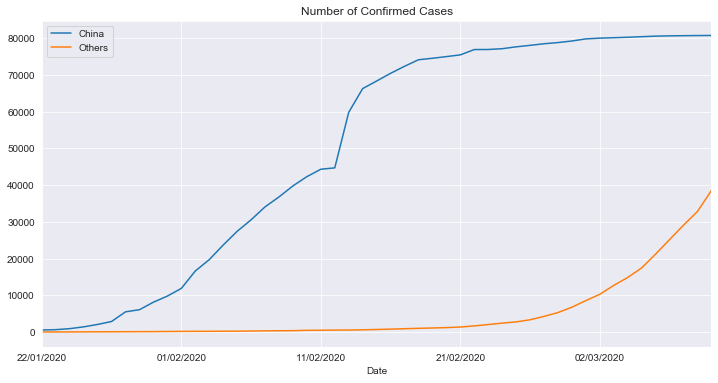

In [5]:
agg_confirmed_df.plot(x = "Date", title = "Number of Confirmed Cases", figsize = (12,6))

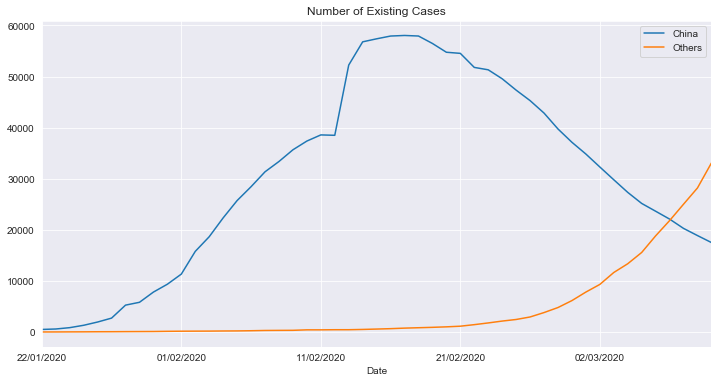

In [6]:
agg_existing_df.plot(x = "Date", title = "Number of Existing Cases", figsize = (12,6))

## Visualize Singapore's Existing Cases

In [7]:
def sg_transpose_df(df):
  df = df[df["Country/Region"] == 'Singapore']
  df.drop(['Lat', 'Long'], axis = 1, inplace = True)
  df = df.T.reset_index()
  df.columns = df.iloc[0]
  df = df.iloc[2:]
  df.columns = ['Date', 'Count']
  df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%d/%m/%Y')
  return df

sg_confirmed_df = sg_transpose_df(confirmed_df.iloc[:,:-1])
sg_death_df = sg_transpose_df(death_df.iloc[:,:-1])
sg_recovered_df = sg_transpose_df(recovered_df.iloc[:,:-1])
sg_existing_df = sg_transpose_df(existing_df.iloc[:,:-1])

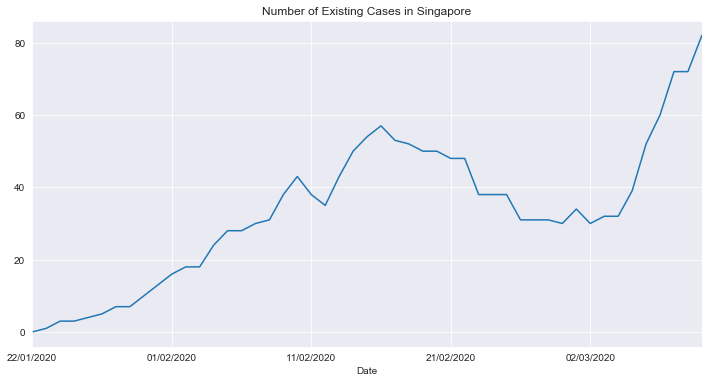

In [8]:
sg_existing_df.plot(x = "Date", title = "Number of Existing Cases in Singapore", figsize = (12,6), legend = False)